<a href="https://colab.research.google.com/github/LeanMBG/coder_ds/blob/main/VisualizacionBarbera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Science I CoderHouse**  - **Comisión 61690**

Alumno: Leandro M. Barbera

##Introducción
El análisis y predicción de las decisiones de los clientes en campañas de marketing es crucial para mejorar la efectividad de las estrategias utilizadas publicitariamente en el sector bancario. El éxito de una campaña de marketing depende en gran parte de identificar a los clientes que tienen una mayor posibilidad de responder positivamente a una oferta. El presente trabajo se enfoca en explorar un conjunto de datos relacionado con campañas de marketing telefónicas realizadas por una entidad bancaria para predecir si los clientes contratarán o no un servicio de depósito a plazo fijo, utilizando diversos atributos socioeconómicos y conductuales.

##Descripción del Problema
Las campañas de marketing dirigidas a clientes existentes representan una inversión importante para las entidades financieras, pero a menudo tienen una baja tasa de éxito. Para maximizar el retorno de estas inversiones, es fundamental identificar los factores que influyen en la decisión de los clientes de aceptar o rechazar las ofertas bancarias. Este análisis permite a las instituciones financieras optimizar sus campañas y dirigirlas a clientes con mayor probabilidad de conversión. Por lo tanto es esencial explorar los datos disponibles, comprender las tendencias y patrones, y desarrollar modelos predictivos que ayuden a mejorar la eficiencia de las campañas.

##Objetivo
El objetivo principal de este trabajo es construir un modelo de clasificación que pueda predecir si un cliente aceptará un depósito a plazo fijo tras una campaña de marketing telefónica. Para alcanzar este objetivo, se realizará un análisis exploratorio de los datos proporcionados, se identificará la influencia de diferentes características socioeconómicas, comportamientos respecto a las decisiones del cliente, y se construirá y evaluará el rendimiento de varios modelos de clasificación.

##Fuente
Este conjunto de datos proporciona información detallada sobre los clientes bancarios, incluyendo variables como la edad, el tipo de empleo, el estado civil, la educación, el balance de la cuenta, la existencia de deudas y préstamos, y otros factores relacionados con las campañas de marketing telefónicas. Estos datos permitirán realizar un análisis exhaustivo y construir un modelo predictivo robusto para mejorar la eficacia de las campañas de marketing.

Los datos utilizados en este trabajo fueron obtenidos de Kaggle y se encuentran disponibles en el siguiente enlace: \
https://drive.google.com/file/d/1QhSafuYhsHVlWat5zCpLAEYXlnioOAw3/view?usp=drive_link \
o a través de: \
https://github.com/LeanMBG/coder_ds/tree/main

## Importación de Librerías y Carga de Datos


In [2]:

from google.colab import drive
drive.mount('/content/drive')

### Importando librerias para manipular datos
import pandas as pd
import numpy  as np

df = pd.read_csv('/content/drive/MyDrive/train.csv', delimiter=';')


Mounted at /content/drive


## Exploración de Datos

En esta sección, exploramos el conjunto de datos para comprender sus características y distribuciones. Esto nos ayudará a identificar patrones y relaciones entre las variables.

- Resumen Inicial: Mostrar las primeras filas del DataFrame y obtener una vista previa de los datos.
- Estadísticas Descriptivas: Calcular estadísticas descriptivas como media, mediana, desviación estándar, etc.
- Distribuciones: Visualizar las distribuciones de las variables numéricas y categóricas.
- Gráficos Exploratorios: Crear gráficos como histogramas, diagramas de dispersión, y diagramas de caja para explorar los datos.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


El conjunto de datos contiene un total de 45211 filas (*registros*), 17 columnas (*variables, de las cuales 10 son objetos, y 7 como int64*).
Se observa que no hay valores faltantes en las columnas.

## Variables Potencialmente Relevantes:
variables potencialmente relevantes basadas en el objetivo del trabajo (las que posean mayor impacto en el comportamiento del cliente, que estén directamente relacionadas con las decisiones financieras y su contexto socioeconómico):
* Age (edad),
* Job (ocupación),
* Marital (estado civil),
* Education (educación),
* Balance (balance/saldo),
* Housing (vivienda),
* Loan (préstamo),
* Pdays (días desde que se contactó por última vez),
* Previous (número de contactos anteriores),
* Duration (duración del último contacto),
* Campaign (número de contactos realizados en la campaña actual),
* Outcome (resultado de la campaña anterior)*


**Propuesta de variable target:**
***"y"** sera la variabel target.

In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


**age:**
* La edad promedio de los clientes es de 40.93 años.
* Mínimo y máximo: La edad mínima es 18 años y la máxima es 95 años. Se observa un rango de edad amplio, abarca adultos jóvenes y personas mayores.
* Desviación estándar: La desviación estándar es de 10.61, significa que existe una variabilidad moderada en la edad de los clientes. Sugiere que la mayoría de los clientes tienen edades que no están tan alejadas del promedio.

**balance:**
* El saldo promedio de los clientes es de 1,362.27 dolares.
* Mínimo y máximo: El saldo mínimo es de -8,019 dolares (indica deuda) y el saldo máximo es de 102,127 dolares.
* Desviación estándar: La desviación estándar es alta (3,044.77), lo que indica una gran variabilidad en los saldos de los clientes. Esto sugiere que algunos clientes tienen deudas elevadas, mientras que otros tienen grandes sumas de dinero en sus cuentas.

**day:**
* El día promedio del mes en el que se realiza el contacto es el 15.81.
* Mínimo y máximo: El día mínimo es 1 y el máximo es 31, cubre todos los días del mes.
* Desviación estándar: La desviación estándar es de 8.32, ésto sugiere que las llamadas se distribuyen de manera uniforme a lo largo del mes.

**duration:**
* La duración promedio de la llamada es de 258.16 segundos (alrededor de 4.3 minutos).
* Mínimo y máximo: La duración mínima es 0 segundos (lo que puede indicar llamadas fallidas o extremadamente breve) y la máxima es 4,918 segundos (aproximadamente 82 minutos - sería 1 hora y 22 minutos).
* Desviación estándar: La desviación estándar es elevada (257.53 segundos), lo que indica que algunas llamadas fueron extremadamente cortas, mientras que otras fueron mucho más largas.
* Este es uno de los factores más importantes, ya que se espera que las llamadas más largas tengan una mayor probabilidad de resultar en una aceptación del depósito en plazo fijo.

**campaign:**
* El número promedio de contactos con cada cliente durante la campaña es de 2.76 veces.
* Mínimo y máximo: El mínimo es 1 contacto y el máximo es 63 contactos.
* Desviación estándar: La desviación estándar es de 3.09, lo que muestra que algunos clientes han sido contactados muchas veces, mientras que otros solo una o dos veces.

**pdays:**

* El promedio de días desde el último contacto en la campaña anterior es de 40.20 días.
* Mínimo y máximo: El valor mínimo es -1, lo que indica que el cliente no fue contactado en la campaña anterior, y el valor máximo es 871 días (casi 3 años).
* Desviación estándar: La desviación estándar es bastante alta (100.13 días), lo que sugiere que algunos clientes fueron contactados recientemente, mientras que otros hace mucho tiempo.

**previous:**
* El número promedio de contactos anteriores es 0.58.
* Mínimo y máximo: El mínimo es 0 contactos y el máximo es 275 contactos.
* Desviación estándar: La desviación estándar es de 2.30, lo que indica que la mayoría de los clientes tuvieron muy pocos contactos previos.
* El número de contactos previos puede ser un indicador de si el cliente ya ha sido impactado antes por campañas de marketing. Aquellos que han sido contactados varias veces en el pasado podrían tener una mayor probabilidad de aceptar el depósito a plazo.

## Hipótesis Relacionadas:

1. Clientes con saldos bancarios más altos tienen mayor probabilidad de aceptar un depósitos a plazo fijo.
2. La duración del último contacto telefónico está positivamente relacionado con la probabilidad de aceptar el depósito.
3. Clientes con mayor nivel educativo son más propensos a aceptar productos financieros complejos.
4. El estado civil del cliente afecta su disposición a aceptar un depósito a plazo fijo
5. Clientes con un historial reciente de contacto positivo con el banco son más propensos a aceptar un depósito a plazo fijo.

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## *Visualizaciones con Matplotlib*

```
# Tiene formato de código
```



**Distribución del Saldo Bancario y aceptación del depósito:**
* Variables: balance, y (Aceptación del depósito)
* compara la distribución del saldo bancario de los clientes que aceptaron (o no) el depósito.
* Interpretación: se observa que la mayoría de los clientes tienen saldos bancarios bajos, independientemente de si aceptaron o no el depósito. La aceptación del depósito (barras naranjas) es mayor entre aquellos con saldos más elevados. Esto sugiere que el saldo bancario no es el único factor que influye en la aceptación del plazo fijo. Aunque la mayoría de los clientes con saldos bajos no aceptan el depósito, aquellos con mayores saldos podrían estar más dispuestos a hacerlo.

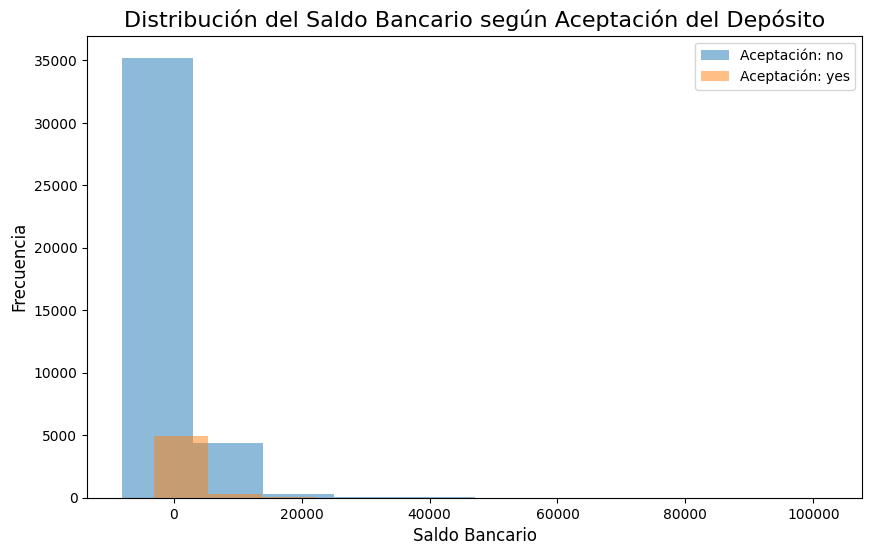

In [14]:
import matplotlib.pyplot as plt

# figura y un conjunto de subgráficas
plt.figure(figsize=(10, 6))

# Graficar del histograma para c/cat de 'y'
for acceptance in df['y'].unique():
    # Filtrar datos según la aceptación
    subset = df[df['y'] == acceptance]

    # Grafica del histograma
    plt.hist(subset['balance'], bins=10, alpha=0.5, label=f'Aceptación: {acceptance}')

# visualización
plt.title('Distribución del Saldo Bancario según Aceptación del Depósito', fontsize=16)
plt.xlabel('Saldo Bancario', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend()

plt.show()


**Estado Civil y aceptación del depósito**

* Variables: marital, y (Aceptación del depósito)
* Muestra la relación entre el estado civil y la aceptación del depósito. La mayor parte de los clientes están casados, seguidos por los solteros y los divorciados. Los clientes casados muestran la mayor tasa de aceptación, los divorciados tienen la menor tasa. Sugiere que el estado civil podría ser un factor importante: las personas casadas parecen estar más predispuestas a aceptar los depósitos, mientras que los divorciados son los menos propensos. Los solteros ocupan una posición intermedia, pero con una tasa de aceptación relativamente baja

*Aclaracion:*
* *divorced = divorciado*
* *married = casado*
* *single = soltero*

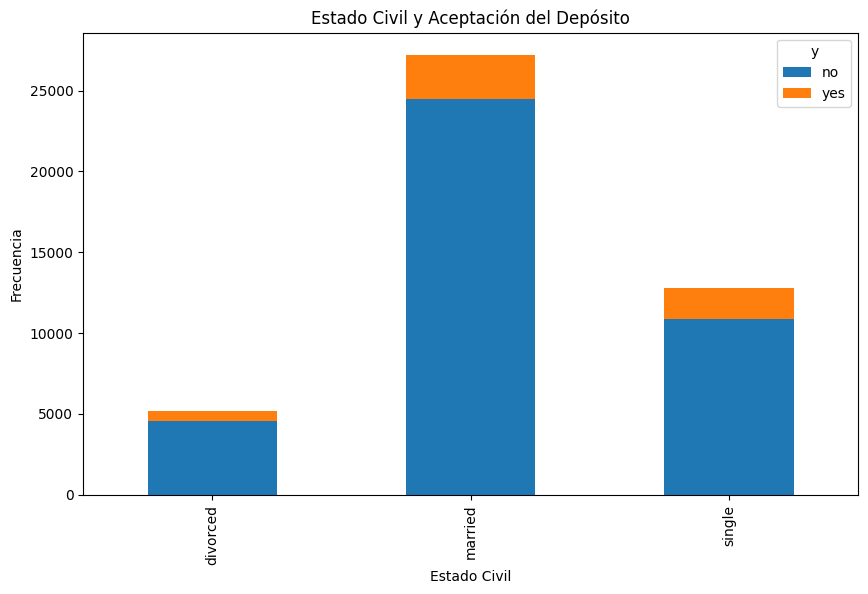

In [15]:
df.groupby(['marital', 'y']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Estado Civil y Aceptación del Depósito')
plt.xlabel('Estado Civil')
plt.ylabel('Frecuencia')
plt.show()


**Duración del contacto vs saldo bancario, según aceptación del depósito**

* Variables: duration, balance, y
* Muestra la relación entre la duración de la llamada (duration) y el saldo bancario (balance).
* Se combinan 2 variables: la duración de la llamada y el saldo bancario, indicando con color si el cliente aceptó o no el depósito. Se observa que cuanto más tiempo dura la llamada, mayor es la probabilidad de aceptación del depósito (puntos amarillos). Los clientes que no aceptaron el depósito (puntos morados) suelen tener llamadas de menor duración. No parece haber una relación clara entre el saldo bancario y la duración del contacto. *La duración de la llamada es un factor que aumenta la probabilidad de aceptación.*

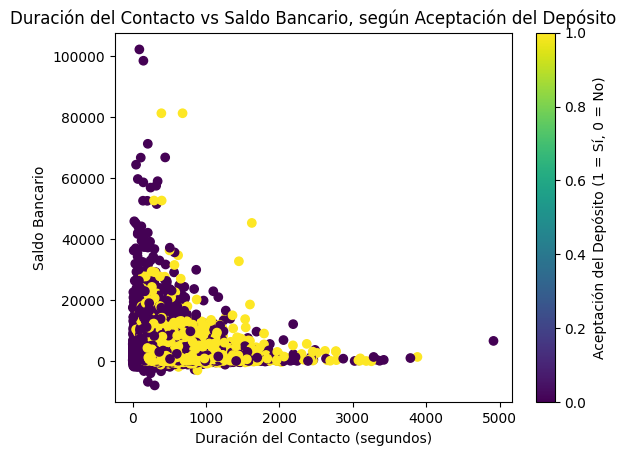

In [16]:
plt.scatter(df['duration'], df['balance'], c=df['y'].apply(lambda x: 1 if x == 'yes' else 0))
plt.title('Duración del Contacto vs Saldo Bancario, según Aceptación del Depósito')
plt.xlabel('Duración del Contacto (segundos)')
plt.ylabel('Saldo Bancario')
plt.colorbar(label='Aceptación del Depósito (1 = Sí, 0 = No)')
plt.show()


##*Visualizaciones con Seaborn*


**Distribución del saldo bancario según aceptación del depósito**

* Variables: balance, y (Aceptación del depósito)
* Este diagrama ofrece una vista detallada sobre la distribución del saldo bancario en función de la aceptación del depósito. Aunque la mediana del saldo es similar para ambos grupos (los que aceptaron y los que no), los puntos fuera de la caja (outliers) muestran que algunos clientes con saldos muy altos han aceptado el depósito. Si bien el saldo bancario no es un factor decisivo en la mayoría de los casos, existe un grupo con saldos altos que muestra ser propensos a aceptar los depósitos.

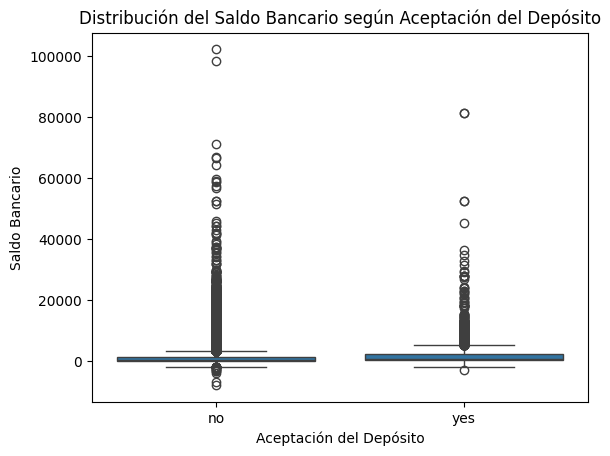

In [17]:
import seaborn as sns
sns.boxplot(x='y', y='balance', data=df)
plt.title('Distribución del Saldo Bancario según Aceptación del Depósito')
plt.xlabel('Aceptación del Depósito')
plt.ylabel('Saldo Bancario')
plt.show()


**Gráfico de Regresión (lmplot): Relación entre la duración del contacto y la probabilidad de aceptación**

* Variables: duration, y (Aceptación del depósito)
* En este gráfico de dispersión, se observa una relación entre la duración de la llamada y la aceptación del depósito. Los puntos anaranjados representan a los clientes que aceptaron el depósito, y se concentran en las llamadas de mayor duración. Por otro lado, los clientes que no aceptaron (puntos azules) tienden a estar en la parte inferior del gráfico, con duraciones de llamadas más cortas. Se confirma la hipótesis de que una llamada más larga está asociada con una mayor probabilidad de que el cliente acepte el depósito de plazo fijo.

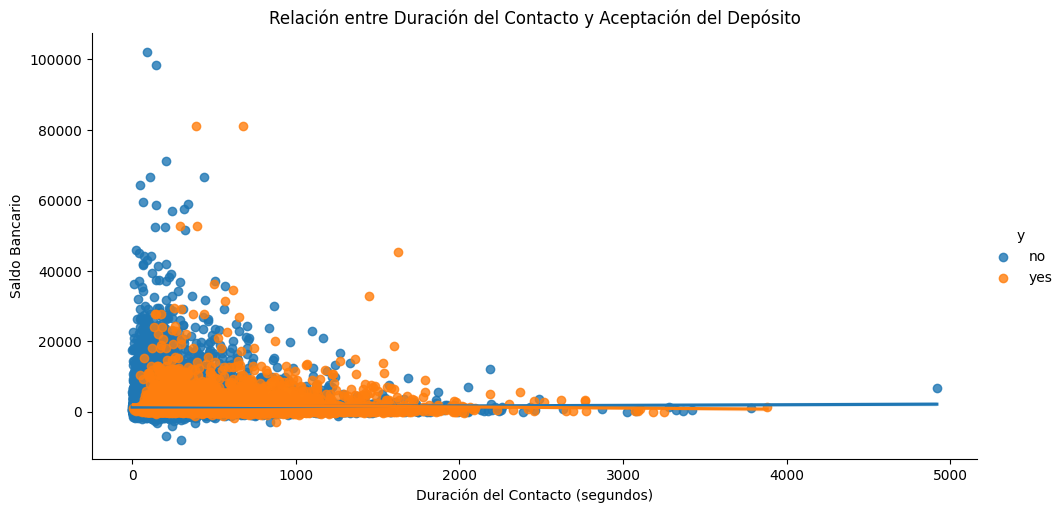

In [18]:
sns.lmplot(x='duration', y='balance', hue='y', data=df, aspect=2)
plt.title('Relación entre Duración del Contacto y Aceptación del Depósito')
plt.xlabel('Duración del Contacto (segundos)')
plt.ylabel('Saldo Bancario')
plt.show()

**Heatmap: Correlación entre variables continuas**

* Variables: balance, duration, campaign, pdays, previous
*  El mapa de calor muestra las correlaciones entre varias variables. La correlación entre balance (saldo bancario) y duration (duración de la llamada) es muy baja (cerca de 0.022), indica que no existe una relación significativa entre estas dos variables.
* La duración de la llamada muestra una correlación positiva con la aceptación del depósito. Esto sugiere que la duración de la llamada es una de las variables más importantes para predecir la aceptación. El saldo bancario parece no ser tan determinante.

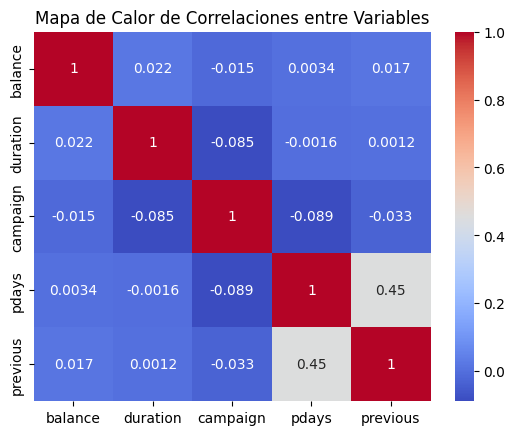

In [19]:
corr = df[['balance', 'duration', 'campaign', 'pdays', 'previous']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlaciones entre Variables')
plt.show()

